In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage, AIMessage
from dotenv import load_dotenv
from langgraph.graph.message import add_messages

In [59]:
load_dotenv()

True

In [60]:
llm=ChatGroq(model='llama-3.1-8b-instant')

In [61]:
llm.invoke('hy').content

'Hello, how are you?'

In [62]:
class ChatState(TypedDict): 
    messages: Annotated[list[BaseMessage], add_messages]

In [63]:
def chat_model(state: ChatState): 

    response=llm.invoke(state['messages'])
    return {'messages': [response]}

In [64]:
graph=StateGraph(ChatState)


# add nodes: 
graph.add_node('chat_model', chat_model)

# add edges: 
graph.add_edge(START, 'chat_model')
graph.add_edge('chat_model', END)

chatbot=graph.compile()


In [65]:
initial_state={
    'messages': 'hy whta is  capital of india?'
}

final_state=chatbot.invoke(initial_state)

In [66]:
final_state

{'messages': [HumanMessage(content='hy whta is  capital of india?', additional_kwargs={}, response_metadata={}, id='72e5eb7d-33d6-4873-9fca-8dc6c0a75ec8'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 44, 'total_tokens': 53, 'completion_time': 0.00640855, 'prompt_time': 0.002057741, 'queue_time': 0.049012279, 'total_time': 0.008466291}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--ec87e765-1d45-4e72-b909-80bc68f92262-0', usage_metadata={'input_tokens': 44, 'output_tokens': 9, 'total_tokens': 53})]}

In [ ]:
initial_state={
    'messages': [HumanMessage(content='who are you?')]
}

final_state=chatbot.invoke(initial_state)

In [68]:
final_state

{'messages': [HumanMessage(content='who are you?', additional_kwargs={}, response_metadata={}, id='c2e185f1-1cac-4ab8-a9a4-a1b0ce8b75d0'),
  AIMessage(content="I'm an artificial intelligence model known as a large language model (LLM) or a conversational AI. I'm a computer program designed to understand and generate human-like text. My purpose is to assist and communicate with users like you through text-based conversations.\n\nI don't have a personal identity, emotions, or consciousness like a human being. I exist solely to provide information, answer questions, and engage in discussions based on my training data. My knowledge is based on a massive dataset of text, which I use to generate responses to your queries.\n\nI can help with a wide range of topics, from general knowledge and entertainment to education and research. I'm here to assist you with any questions or topics you'd like to discuss.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'pr

In [74]:
final_state['messages'][-1]

AIMessage(content="I'm an artificial intelligence model known as a large language model (LLM) or a conversational AI. I'm a computer program designed to understand and generate human-like text. My purpose is to assist and communicate with users like you through text-based conversations.\n\nI don't have a personal identity, emotions, or consciousness like a human being. I exist solely to provide information, answer questions, and engage in discussions based on my training data. My knowledge is based on a massive dataset of text, which I use to generate responses to your queries.\n\nI can help with a wide range of topics, from general knowledge and entertainment to education and research. I'm here to assist you with any questions or topics you'd like to discuss.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 39, 'total_tokens': 187, 'completion_time': 0.197658207, 'prompt_time': 0.001804496, 'queue_time': 0.053630333, 'total_time': 0

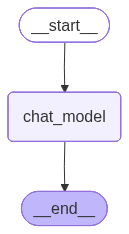

In [69]:
chatbot

In [ ]:
while True: 
    user_input=input('Enter your query...')
    if user_input in ['exit', 'bye', 'break']: 
        break
    
    response=chatbot.invoke({'messages': [HumanMessage(content=user_input)]})
    print(f'Human: {user_input}')
    print(f'Ai: {response['messages'][-1].content}')

Human: hy
Ai: Hello. Is there something I can help you with or would you like to chat?
Human: what is the capital of india
Ai: The capital of India is New Delhi.
Human: my name is pankaj
Ai: Hello Pankaj, it's nice to meet you. Is there something I can help you with or would you like to chat?
Human: what is my name
Ai: I don't have any information about your name. I'm a large language model, I don't have the ability to retain information about individual users or their identities. Each time you interact with me, it's a new conversation and I don't have any prior knowledge about you. If you'd like to share your name with me, I'd be happy to chat with you!
Human: 3*7
Ai: 3 * 7 = 21
Human: add 19 to result
Ai: I don't have a result to add 19 to. Can you please provide the initial number or result you would like me to add 19 to?


In [79]:
# here chat conversation history is not maintaining because invoke is executing each time
# eg: Human: hy
#     Ai: Hello. Is there something I can help you with or would you like to chat?

            # end workflow

# start again the workflow(don't know about previous state or workflow)
#     Human: what is the capital of india
